In [1]:
'''
A Convolutional Network implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/}
'''




'\nA Convolutional Network implementation example using TensorFlow library.\nThis example is using the MNIST database of handwritten digits\n(http://yann.lecun.com/exdb/mnist/)\n\nAuthor: Aymeric Damien\nProject: https://github.com/aymericdamien/TensorFlow-Examples/}\n'

## Cargar Datos

In [2]:
import numpy as np
import scipy.io
Read = scipy.io.loadmat("Documento3/etiquetas_cuad.mat")
Read

{'__globals__': [],
 '__header__': 'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Dec 05 10:17:08 2016',
 '__version__': '1.0',
 'lxn': array([[ 6, 30,  8, ...,  9, 27, 28]], dtype=uint8),
 'lyn': array([[31, 17,  9, ..., 31,  9, 24]], dtype=uint8),
 'xn': array([[81, 92, 59, ..., 18, 12, 83]], dtype=uint8),
 'yn': array([[38,  4, 11, ..., 20, 51, 16]], dtype=uint8)}

In [3]:
yrect = Read['lyn']
xrect = Read['lxn']

In [4]:
import tensorflow as tf


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


('Filename', 'ind2001.jpg')
('ANTES', (69, 98))
(69, 98)
(69, 98)
(69, 98)


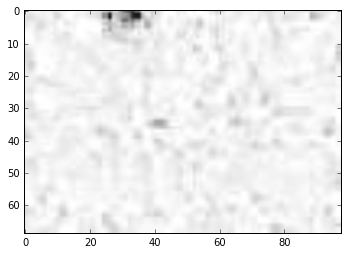

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.image as mpimg

from skimage.feature import hog
from skimage import data, color, exposure



from skimage import color
from skimage import transform as tf
import pylab as pl
import numpy as np
import os

#fpath = "damageBuenos"
fpath = "IndBuenos"
filenames = os.listdir(fpath)


lista1 = []
for i in range(len(filenames)):
    #lista1.append('dam'+str(i+1)+'.jpg')
    lista1.append('ind'+str(i+1)+'.jpg')


train_list = []
for i in range(len(filenames)):
    #jojo ="damageBuenos/"+lista1[i]
    jojo ="IndBuenos/"+lista1[i]
    img1=mpimg.imread(jojo)
    img1 = color.rgb2gray(img1)
    train_list.append(img1)

imagenes = []
clases = []

#fpath = "damageBuenos"
fpath = "IndBuenos"
filenames = os.listdir(fpath)
i = 2000


#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

#jojo ="damageBuenos/"+lista1[i]
jojo ="IndBuenos/"+lista1[i]
img1=mpimg.imread(jojo)
img1 = color.rgb2gray(img1)
print("Filename", lista1[i])
print("ANTES", img1.shape)
#print(img1.shape)

print(img1.shape)


print(img1.shape)

#plt.imshow(img1,cmap=plt.cm.gray)

#fd, img2 = hog(img1, orientations=2, pixels_per_cell=(7, 7),
#                    cells_per_block=(4, 4), visualise=True)
#img3 = exposure.rescale_intensity(img2, in_range=(0, 0.02))


print(np.shape(img1))
plt.imshow(img1,cmap=plt.cm.gray)

## Algunas funciones: Estirar es realizar reshape a la lista

In [6]:
def Estirar(lista):
    aux = lista[0]
    shape0 = aux.shape[0] 
    shape1 = aux.shape[1]
    
    otraLista = []
    for i in range(len(lista)):
        elemento = lista[i]
        otraLista.append(np.reshape(elemento,(shape0*shape1,)))
    otraLista = np.asarray(otraLista)
    return otraLista

In [7]:
chen = Estirar(train_list)

In [8]:
listanueva = Estirar(train_list)

In [20]:
listanueva.shape

(6000, 6762)

In [9]:
listanueva.shape
a1,a2,a3,a4 =filtrarRazon(listanueva,2.5)

NameError: name 'filtrarRazon' is not defined

## transformar Lista: realizar data augmentation
## Filtrar razon: es filtrar rectágulos
## obtener train 2 : obtener train y test 

In [11]:
def transformarLista(lista2nueva, lista3nueva):
    lista2 = []
    lista3 = []
    for i in range(len(lista2nueva)):
        img2 = np.reshape(lista2nueva[i,:],(69,98))
        img2ud = np.flipud(img2)
        img2lr = np.fliplr(img2)
        img2udlr = np.fliplr(img2ud)
        
        img3 = np.reshape(lista3nueva[i,:],(69,98))
        img3ud = np.flipud(img3)
        img3lr = np.fliplr(img3)
        img3udlr = np.fliplr(img3ud)
        
        lista2.append(np.reshape(img2, (69*98,)))
        lista2.append(np.reshape(img2ud, (69*98,)))
        lista2.append(np.reshape(img2lr, (69*98,)))
        lista2.append(np.reshape(img2udlr, (69*98,)))
        
        lista3.append(np.reshape(img3, (69*98,)))
        lista3.append(np.reshape(img3ud, (69*98,)))
        lista3.append(np.reshape(img3lr, (69*98,)))
        lista3.append(np.reshape(img3udlr, (69*98,)))
    lista2 = np.asarray(lista2)
    lista3 = np.asarray(lista3)
    return lista2, lista3    

In [12]:
def filtrarRazon(lista, condicion):
    parte1 = lista[:2000,:]
    parte2 = lista[2000:4000,:]
    parte3 = lista[4000:6000,:]
    
    unaDiv = 1.0*yrect/xrect
    dosDiv = 1.0*xrect/yrect

    pepe1 = unaDiv >= condicion
    pepe2 = dosDiv >= condicion
    pepe3 = pepe1+pepe2
    
    pepe3 = np.transpose(pepe3)
    pepe3 = np.reshape(pepe3, (len(pepe3),))
#    print("pepe3", pepe3.shape)
#    print("parte3 ", parte3.shape)
    parte3nueva = parte3[pepe3]

    tamano = len(parte3nueva)
#    print("tamano ", tamano)
#    print("parte3nueva ",parte3nueva.shape)
    testIndex = tamano/10
    indextoRand2 = np.arange(2000)
    np.random.shuffle(indextoRand2)
    parte2 = parte2[indextoRand2]
    
    indextoRand3 = np.arange(tamano)
    np.random.shuffle(indextoRand3)
    parte3nueva = parte3nueva[indextoRand3]
    parte2nueva = parte2[:tamano]
    
    parte2nueva, parte3nueva = transformarLista(parte2nueva, parte3nueva)
    
    print(parte2nueva.shape)
    
    tamano = len(parte3nueva)
    testIndex = tamano/10
    
    listap = []
    listan = []
    for i in range(tamano):
        listap.append([1,0])
        listan.append([0,1])
    listap = np.asarray(listap)
    listan = np.asarray(listan)
    
    testx2 = parte2nueva[:testIndex]
    testx3 = parte3nueva[:testIndex]
    
    testy2 = listap[:testIndex]
    testy3 = listan[:testIndex]
    
#    print("testx2 shape ",testx2.shape )
#    print("testx3 shape ",testx3.shape )
    
    testxfin = np.vstack((testx2,testx3))
    testyfin = np.vstack((testy2,testy3))
    
    
    trainx2 = parte2nueva[testIndex:]
    trainx3 = parte3nueva[testIndex:]
    
    trainy2 = listap[testIndex:]
    trainy3 = listan[testIndex:]

#    print("trainx2 shape ",trainx2.shape )
#    print("trainx3 shape ",trainx3.shape )
    
    trainxfin = np.vstack((trainx2,trainx3))
    trainyfin = np.vstack((trainy2,trainy3))
    
    indextest = np.arange(len(testxfin))
    np.random.shuffle(indextest)
    
    testxfin = testxfin[indextest]
    testyfin = testyfin[indextest]

    indextrain = np.arange(len(trainxfin))
    np.random.shuffle(indextrain)
    
    trainxfin = trainxfin[indextrain]
    trainyfin = trainyfin[indextrain]
    
    return trainxfin, trainyfin, testxfin, testyfin


In [13]:
def ObtenerTrain2(data, option):
    example = data[0]
    shape1 = example.shape[0]
    shape2 = example.shape[1]
    data_array = []
    for i in range(len(data)):
        data_array.append(np.reshape(data[i],(shape1*shape2,)))
    data_array = np.asarray(data_array)
    path_normal = 0
    path_circ = 2000
    path_rect = 4000
    if option == 0:
        path1 = path_normal
        path2 = path_circ
    elif option == 1:
        path1 = path_normal
        path2 = path_rect
    elif option == 2:
        path1 = path_circ
        path2 = path_rect
    listaTargetAux = np.ones((4000,2))
    aux = np.arange(4000)
    listaIndices = np.ones(4000)
    np.random.shuffle(aux)
    for i in range(2000):
            listaIndices[i] = int(i + path1)
            listaTargetAux[i] = np.array([1,0])
    for i in range(2000):
            listaIndices[i+2000] = int(i + path2)
            listaTargetAux[i+2000] = np.array([0,1])
    
    indice_final = listaIndices[aux]  
    indice_final = indice_final.astype(int)
    target_final = listaTargetAux[aux]
    print(indice_final)
    train_final = data_array[indice_final]
    train_x, train_y, test_x, test_y = train_final[:3600], target_final[:3600],train_final[3600:], target_final[3600:] 
    return train_x, train_y, test_x, test_y, indice_final[3600:]

In [14]:
def Revolver(train_x, train_y):
    tamano = len(train_x)
    index = np.arange(tamano)
    np.random.shuffle(index)
    return train_x[index], train_y[index]

In [15]:
train_x, train_y, test_x, test_y, indiceFinal=ObtenerTrain2(train_list,0)

[1183   18 1232 ...,  736 2376 3353]


In [ ]:
print(len(train_x))

In [16]:
sum(test_y)

array([ 189.,  211.])

In [17]:
print ("train_x: ", train_x.shape)
print ("train_y: ", train_y.shape)
print ("test_x: ", test_x.shape)
print ("test_y: ", test_y.shape)
import tensorflow as tf

('train_x: ', (3600, 6762))
('train_y: ', (3600, 2))
('test_x: ', (400, 6762))
('test_y: ', (400, 2))


In [18]:
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [11]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fdaa718f490>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fda6c12bd10>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fda6c12be50>)

In [28]:

import tensorflow as tf
# Parameters
learning_rate = 0.001
training_iters = 200000
batch_size = 100
display_step = 10

# Network Parameters
n_input = 69*98 # MNIST data input (img shape: 28*28)
n_classes = 2 # MNIST total classes (0-9 digits)
dropout = 0.5 # Dropout, probability to keep units

# tf Graph input
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)



In [29]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')


# Create model
def conv_net(x, weights, biases, dropout,cond):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 69, 98, 1])


    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    if (cond == 1):
        print("NOO")
        conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling)
        conv3 = maxpool2d(conv3, k=2)
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    
        fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    else:
        print("SIIi")
        fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
        print("si2222")
    #print("antes")
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    #print("despues")
    fc1 = tf.nn.relu(fc1)
    #print("intngo1")
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    #print("despues")
    fc2 = tf.nn.relu(fc2)
    
    # Output, class prediction
    out = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    print("intento3")
    return out

In [27]:
# Store layers weight & bias
weights = {
    # 5x5 conv, 1 input, 32 outputs
    'wc1': tf.Variable(tf.random_normal([6, 9, 1, 32])),
    # 5x5 conv, 32 inputs, 64 outputs
    'wc2': tf.Variable(tf.random_normal([5, 8, 32, 64])),
#    'wc3': tf.Variable(tf.random_normal([3, 6, 64, 64])),
    # fully connected, 7*7*64 inputs, 1024 outputs
#6x9, 5x8    'wd1': tf.Variable(tf.random_normal([14*19*64, 1024])),
    'wd1': tf.Variable(tf.random_normal([14*19*64, 2024])),
#    'wd1': tf.Variable(tf.random_normal([6*7*64, 1024])),
    # 1024 inputs, 10 outputs (class prediction)
    'out': tf.Variable(tf.random_normal([2024, n_classes]))
}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bc3': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([2024])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Evaluate model
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf.initialize_all_variables()


TypeError: conv_net() takes exactly 5 arguments (4 given)

In [30]:
def ObtenerParam(param):
    if (param== 0):
        supcond = 0
        dropout = 0.5
        wc1p1 = 4
        wc1p2 = 5
        wc2p1 = 4
        wc2p2 = 4
        wc3p1 = 0
        wc3p2 = 0
        wd1p1 = 15
        wd1p2 = 22
    if (param==1):
        supcond = 0
        dropout = 0.75
        wc1p1 = 4
        wc1p2 = 5
        wc2p1 = 4
        wc2p2 = 4
        wc3p1 = 0
        wc3p2 = 0
        wd1p1 = 15
        wd1p2 = 22
    if (param==2):
        supcond = 0
        dropout = 0.5
        wc1p1 = 8
        wc1p2 = 9
        wc2p1 = 6
        wc2p2 = 8
        wc3p1 = 0
        wc3p2 = 0
        wd1p1 = 13
        wd1p2 = 19
    if (param==3):
        supcond = 0
        dropout = 0.75
        wc1p1 = 8
        wc1p2 = 9
        wc2p1 = 6
        wc2p2 = 8
        wc3p1 = 0
        wc3p2 = 0
        wd1p1 = 13
        wd1p2 = 19     
    if (param==4):
        supcond = 1
        dropout = 0.5
        wc1p1 = 4
        wc1p2 = 5
        wc2p1 = 4
        wc2p2 = 4
        wc3p1 = 4
        wc3p2 = 3
        wd1p1 = 6
        wd1p2 = 10      
    if (param==5):
        supcond = 1
        dropout = 0.75
        wc1p1 = 4
        wc1p2 = 5
        wc2p1 = 4
        wc2p2 = 4
        wc3p1 = 4
        wc3p2 = 3
        wd1p1 = 6
        wd1p2 = 10
    return supcond, dropout, wc1p1, wc1p2, wc2p1, wc2p2, wc3p1, wc3p2,wd1p1,wd1p2

In [36]:
train_x, train_y, test_x, test_y, indiceFinal=ObtenerTrain2(train_list,0)
print("sum test y",sum(test_y))
print ("train_x: ", train_x.shape)
print ("train_y: ", train_y.shape)
print ("test_x: ", test_x.shape)
print ("test_y: ", test_y.shape)

[2104 2622 3645 ...,   95   97 2284]
('sum test y', array([ 205.,  195.]))
('train_x: ', (3600, 6762))
('train_y: ', (3600, 2))
('test_x: ', (400, 6762))
('test_y: ', (400, 2))


In [37]:

# Launch the graph

epoch_M = 20

epocas = np.arange(epoch_M)
listaAcc = np.ones(epoch_M)
dropout = 0.5
listaCor = []
SuperListaAcc = []
jojolist = [1,3,5]

#train_x, train_y, test_x, test_y =filtrarRazon(listanueva, 2)
for numi in range(6):

    # Store layers weight & bias
    x = tf.placeholder(tf.float32, [None, n_input])
    y = tf.placeholder(tf.float32, [None, n_classes])
    keep_prob = tf.placeholder(tf.float32) #dropout (keep probability)
    
    supcond, dropout, wc1p1, wc1p2, wc2p1, wc2p2, wc3p1, wc3p2, wd1p1, wd1p2 = ObtenerParam(numi)
    print("AAAAAAAAAAA",supcond, dropout, wc1p1, wc1p2, wc2p1, wc2p2, wc3p1, wc3p2, wd1p1, wd1p2 )
    weights = {
        # 5x5 conv, 1 input, 32 outputs
        'wc1': tf.Variable(tf.random_normal([wc1p1, wc1p2, 1, 32])),
        # 5x5 conv, 32 inputs, 64 outputs
        'wc2': tf.Variable(tf.random_normal([wc2p1, wc2p2, 32, 64])),
        'wc3': tf.Variable(tf.random_normal([wc3p1, wc3p2, 64, 64])),
        # fully connected, 7*7*64 inputs, 1024 outputs
        #6x9, 5x8    'wd1': tf.Variable(tf.random_normal([14*19*64, 1024])),
        'wd1': tf.Variable(tf.random_normal([wd1p1*wd1p2*64, 2024])),
        # 'wd1': tf.Variable(tf.random_normal([6*7*64, 1024])),
        'wd2': tf.Variable(tf.random_normal([2024, 524])),
        # 1024 inputs, 10 outputs (class prediction)
        'out': tf.Variable(tf.random_normal([524, n_classes]))
    }

    biases = {
        'bc1': tf.Variable(tf.random_normal([32])),
        'bc2': tf.Variable(tf.random_normal([64])),
        'bc3': tf.Variable(tf.random_normal([64])),
        'bd1': tf.Variable(tf.random_normal([2024])),
        'bd2': tf.Variable(tf.random_normal([524])),
        'out': tf.Variable(tf.random_normal([n_classes]))
    }

    # Construct model
    pred = conv_net(x, weights, biases, keep_prob, supcond)


    # Define loss and optimizer
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(pred, y))
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # Evaluate model
    correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

    # Initializing the variables
    init = tf.initialize_all_variables()
    listaCor = []
    listaAcc = np.ones(epoch_M)
    listanueva = Estirar(train_list)
    #train_x, train_y, test_x, test_y =filtrarRazon(listanueva, 2)
    
    with tf.Session() as sess:
        sess.run(init)
        step = 1
        # Keep training until reach max iterations
        for epoch in range(epoch_M):
            i = 0 
            train_x, train_y = Revolver(train_x, train_y)
            while i< len(train_x):
                start = i
                end = i + batch_size
                
                if (len(train_x) - i)<batch_size:
                    end = len(train_x)
                batch_x = train_x[start:end]
                batch_y = train_y[start:end]
                
                # Run optimization op (backprop)
                #print(batch_x.shape)
                #print(batch_y.shape)
                #print("weight ", weights )
                #print("batch_x ", batch_x.shape)
                #print("batch_y ", batch_y.shape)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
                #if i % 400  == 0:
                #    print("epoch: "+str(epoch)+",  iter:"+str(i))
                    # Calculate batch loss and accuracy
                #    loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                #                                              y: batch_y,
                #                                              keep_prob: 1.})
                #    print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                #      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                #      "{:.5f}".format(acc)
                #print("paso")
                i +=batch_size
            if (epoch%5 == 0):
                print("epoch: "+ str(epoch))
            
            epoch += 1
            res1, res2 = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
            listaAcc[epoch-1] = res1 
            listaCor.append(res2)
        print "Optimization Finished!"
        
    # Calculate accuracy for 256 mnist test images
    
    
#    print "Testing Accuracy:", \
        [AccF, correctF] = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
        print "Testing Acccuracy: ",AccF
#      print "L Razon", lrazon
        
    SuperListaAcc.append(listaAcc)    
        
        
   

('AAAAAAAAAAA', 0, 0.5, 4, 5, 4, 4, 0, 0, 15, 22)
SIIi
si2222
intento3
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch: 0
epoch: 5
epoch: 10
epoch: 15
Optimization Finished!
Testing Acccuracy:  0.9675
('AAAAAAAAAAA', 0, 0.75, 4, 5, 4, 4, 0, 0, 15, 22)
SIIi
si2222
intento3
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch: 0
epoch: 5
epoch: 10
epoch: 15
Optimization Finished!
Testing Acccuracy:  0.96
('AAAAAAAAAAA', 0, 0.5, 8, 9, 6, 8, 0, 0, 13, 19)
SIIi
si2222
intento3
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch: 0
epoch: 5
epoch: 10
epoch: 15
Optimization Finished!
Testing Acccuracy:  0.97
('AAAAAAAAAAA', 0, 0.75, 8, 9, 6, 8, 0, 0, 13, 19)
SIIi
si2222
intento3
Instructions for updating:
Use `tf.global_variables_initializer` instead.
epoch: 0
epoch: 5
epoch: 10
epoch: 15
Optimization Finished!
Testing Acccuracy:  0.975
('AAAAAAAAAAA', 1, 0.5, 4, 5, 4, 4, 4, 3, 6, 10)
NOO
intento3
Instructi

In [44]:
for i in SuperListaAcc:
    print(np.max(i))
listaguardar = np.asarray(SuperListaAcc)
listaguardar.dump("circ_vs_nothing")

0.97000002861
0.977500021458
0.982500016689
0.982500016689
0.987500011921
0.982500016689


In [46]:
# Launch the graph

epoch_M = 100

epocas = np.arange(epoch_M)
listaAcc = np.ones(epoch_M)
dropout = 0.5
listaCor = []
listaRazon = [1,1.25,1.5,1.75, 2.0,2.5]
SuperListaAcc = []
for lrazon in listaRazon:
    listaCor = []
    listaAcc = np.ones(epoch_M)
    listanueva = Estirar(train_list)
    train_x, train_y, test_x, test_y =filtrarRazon(listanueva, lrazon)
    with tf.Session() as sess:
        sess.run(init)
        step = 1
        # Keep training until reach max iterations
        for epoch in range(epoch_M):
            i = 0 
            train_x, train_y = Revolver(train_x, train_y)
            while i< len(train_x):
                start = i
                end = i + batch_size
                if (len(train_x) - i)<batch_size:
                    end = len(train_x)
                batch_x = train_x[start:end]
                batch_y = train_y[start:end]
                
                # Run optimization op (backprop)
                #print(batch_x.shape)
                #print(batch_y.shape)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
                #if i % 400  == 0:
                #    print("epoch: "+str(epoch)+",  iter:"+str(i))
                    # Calculate batch loss and accuracy
                #    loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                #                                              y: batch_y,
                #                                              keep_prob: 1.})
                #    print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                #      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                #      "{:.5f}".format(acc)
                i +=batch_size
            if (epoch%5 == 0):
                print("epoch: "+ str(epoch))
            
            epoch += 1
            res1, res2 = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
            listaAcc[epoch-1] = res1 
            listaCor.append(res2)
        print "Optimization Finished!"
        
    # Calculate accuracy for 256 mnist test images
    
    
#    print "Testing Accuracy:", \
        [AccF, correctF] = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
        print "Testing Acccuracy: ",AccF
        print "L Razon", lrazon
        
    SuperListaAcc.append(listaAcc)    
        
        
        
ij         

epoch: 0
epoch: 5
epoch: 10
epoch: 15
epoch: 20
epoch: 25
epoch: 30
epoch: 35
epoch: 40
epoch: 45
epoch: 50
epoch: 55
epoch: 60
epoch: 65
epoch: 70
epoch: 75
epoch: 80
epoch: 85
epoch: 90
epoch: 95
Optimization Finished!
Testing Acccuracy:  0.505
L Razon 1
epoch: 0
epoch: 5
epoch: 10
epoch: 15
epoch: 20
epoch: 25
epoch: 30
epoch: 35
epoch: 40
epoch: 45
epoch: 50
epoch: 55
epoch: 60
epoch: 65
epoch: 70
epoch: 75
epoch: 80
epoch: 85
epoch: 90
epoch: 95
Optimization Finished!
Testing Acccuracy:  0.503401
L Razon 1.25
epoch: 0
epoch: 5
epoch: 10
epoch: 15
epoch: 20
epoch: 25
epoch: 30
epoch: 35
epoch: 40
epoch: 45
epoch: 50
epoch: 55
epoch: 60
epoch: 65
epoch: 70
epoch: 75
epoch: 80
epoch: 85
epoch: 90
epoch: 95
Optimization Finished!
Testing Acccuracy:  0.517857
L Razon 1.5
epoch: 0
epoch: 5
epoch: 10
epoch: 15
epoch: 20
epoch: 25
epoch: 30
epoch: 35
epoch: 40
epoch: 45
epoch: 50
epoch: 55
epoch: 60
epoch: 65
epoch: 70
epoch: 75
epoch: 80
epoch: 85
epoch: 90
epoch: 95
Optimization Finishe

0.541818201542


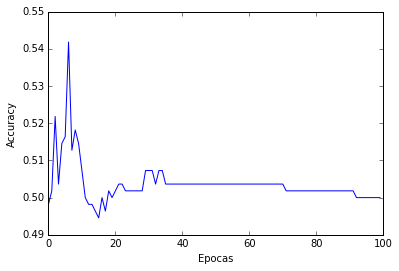

In [23]:
ij = 1

epocas = np.arange(100)
plt.plot(epocas, SuperListaAcc[ij])
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
print(np.max(SuperListaAcc[ij]))

In [28]:
ieie = np.asarray(SuperListaAcc)
ieie.shape

(6, 100)

In [60]:
SuperListaAcc = np.load("SuperLista2")

In [29]:
ieie.dump("SuperLista2")

In [ ]:
# Launch the graph

epoch_M = 1

epocas = np.arange(epoch_M)
listaAcc = np.ones(epoch_M)
dropout = 0.5
listaCor = []

with tf.Session() as sess:
    sess.run(init)
    step = 1
    # Keep training until reach max iterations
    for epoch in range(epoch_M):
            i = 0 
            train_x, train_y = Revolver(train_x, train_y)
            while i< len(train_x):
                start = i
                end = i + batch_size
                batch_x = train_x[start:end]
                batch_y = train_y[start:end]
                
                # Run optimization op (backprop)
                #print(batch_x.shape)
                #print(batch_y.shape)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y,
                                       keep_prob: dropout})
                if i % 400  == 0:
                    print("epoch: "+str(epoch)+",  iter:"+str(i))
                    # Calculate batch loss and accuracy
                #    loss, acc = sess.run([cost, accuracy], feed_dict={x: batch_x,
                #                                              y: batch_y,
                #                                              keep_prob: 1.})
                #    print "Iter " + str(step*batch_size) + ", Minibatch Loss= " + \
                #      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                #      "{:.5f}".format(acc)
                i +=batch_size
            epoch += 1
            res1, res2 = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
            listaAcc[epoch-1] = res1 
            listaCor.append(res2)
    print "Optimization Finished!"

    # Calculate accuracy for 256 mnist test images
    
    
#    print "Testing Accuracy:", \
    [AccF, correctF] = sess.run([accuracy, correct_pred], feed_dict={x: test_x,
                                      y: test_y,
                                      keep_prob: 1.})
    print "Testing Acccuracy: ",AccF

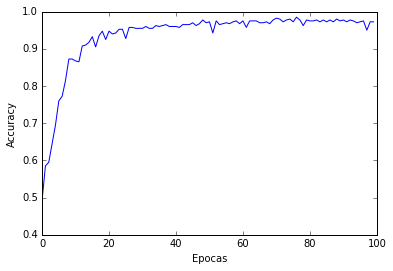

In [16]:
plt.plot(epocas, listaAcc)
plt.xlabel('Epocas')
plt.ylabel('Accuracy')

In [17]:
np.max(listaAcc)

0.98500001430511475

In [ ]:
Jojo = listaCor[13]
mask = np.ones(len(Jojo), dtype=bool) # all elements included/True.
mask[indiceFinal] = False
Jojo

In [101]:
indiceFinal[-listaCor[13]]

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:1: DeprecationWarning: numpy boolean negative, the `-` operator, is deprecated, use the `~` operator or the logical_not function instead.
  if __name__ == '__main__':


array([ 711, 3066, 2847, 3000, 3143, 3106, 2152, 2357,  337,  582, 1457,
       2055, 2725, 3035])

In [32]:
    aa =np.arange(2)
aa[0] =1

In [19]:
def obtenerTrain(data, option):
    #opcion = 0 ---> data nada vs data circular [0:2000] vs [2000:4000] 
    #opcion = 1 ---> data nada vs data rectangular [0:2000] vs [4000:6000]
    #opcion = 2 ---> data circular vs data rectangular [2000:4000] vs [4000:6000]
    #opcion = 3 ---> Todos, 3 clases, nada vs circ vs rect
    if option == 3:    
        listaIndices = np.ones(6000)
        listaTargetAux = np.ones(6000)
        for i in range(2000):
            listaTargetAux[i] = 0
            listaIndices[i] = i
        for i in range(2000):
            listaTargetAux[i] = 1
            listaIndices[i] = i + 2000
        for i in range(2000):
            listaTargetAux[i] = 2
            listaIndices[i] = i + 4000
        np.random.shuffle(listaIndices)
        ListaTrain = []
        ListaTarget = np.ones((6000,1))
        for i in range(6000):
            ListaTrain.append(data[int(listaIndices[i])])
            ListaTarget[i] = listaTargetAux[int(listaIndices[i])]
        return [ListaTrain, ListaTarget]
    
    
    path_normal = 0
    path_circ = 2000
    path_rect = 4000
    if option == 0:
        path1 = path_normal
        path2 = path_circ
    elif option == 1:
        path1 = path_normal
        path2 = path_rect
    elif option == 2:
        path1 = path_circ
        path2 = path_rect
    
    listaIndices = np.ones(4000)
    listaTargetAux = np.ones(6000)
    for i in range(2000):
            listaTargetAux[i] = 0
            listaIndices[i] = i + path1
    for i in range(2000):
            listaTargetAux[i+2000] = 1
            listaIndices[i] = i + path2
    for i in range(2000):
            listaTargetAux[i+4000] = 2
    np.random.shuffle(listaIndices)
    ListaTrain = []
    ListaTarget = np.ones(4000)
    for i in range(4000):                
        ListaTrain.append(data[int(listaIndices[i])])
        ListaTarget[i] = listaTargetAux[int(listaIndices[i])]
    return [ListaTrain, ListaTarget]
    
    

In [33]:
def ObtenerTrain2(data, option):
    example = data[0]
    shape1 = example.shape[0]
    shape2 = example.shape[1]
    data_array = []
    for i in range(len(data)):
        data_array.append(np.reshape(data[i],(shape1*shape2,)))
    data_array = np.asarray(data_array)
    path_normal = 0
    path_circ = 2000
    path_rect = 4000
    if option == 0:
        path1 = path_normal
        path2 = path_circ
    elif option == 1:
        path1 = path_normal
        path2 = path_rect
    elif option == 2:
        path1 = path_circ
        path2 = path_rect
    listaTargetAux = np.ones((4000,2))
    aux = np.arange(4000)
    listaIndices = np.ones(4000)
    np.random.shuffle(aux)
    for i in range(2000):
            listaIndices[i] = int(i + path1)
            listaTargetAux[i] = np.array([1,0])
    for i in range(2000):
            listaIndices[i+2000] = int(i + path2)
            listaTargetAux[i+2000] = np.array([0,1])
    
    indice_final = listaIndices[aux]  
    indice_final = indice_final.astype(int)
    target_final = listaTargetAux[aux]
    print(indice_final)
    train_final = data_array[indice_final]
    train_x, train_y, test_x, test_y = train_final[:3600], target_final[:3600],train_final[3600:], target_final[3600:] 
    return train_x, train_y, test_x, test_y
    

In [82]:
a=np.arange(3)
lala = np.array([
        [1,2,3],
        [4,5,6],
        [7,8,9]
    ])

In [121]:
je = np.reshape(lala,(9,))
type(je[0])

numpy.int64

In [124]:

ja.shape[0]
a = np.array([1.,2.,3.])

In [126]:
int(a)

TypeError: only length-1 arrays can be converted to Python scalars

In [110]:
ja = train_list[0]
je = np.reshape(ja,(ja.shape[0]*ja.shape[1],))

In [112]:
je.shape

(6762,)

In [34]:
train_x, train_y, test_x, test_y=ObtenerTrain2(train_list,0)

[2814 2309 2329 ..., 3771 3883 1788]


In [133]:
a.shape
c.shape

(400, 6762)

In [74]:
len(b)

4000

In [35]:
ja = (1,2)
ja[1]

2

In [7]:
import numpy as np
pepe = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(pepe)

In [11]:
pepe

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from skimage.feature import hog
from skimage import data, color, exposure



from skimage import color
from skimage import transform as tf
import pylab as pl
import numpy as np
import os

imagenes = []
clases = []

fpath = "IndBuenos"
filenames = os.listdir(fpath)
i = 2000


#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

jojo ="IndBuenos/"+lista1[i]
img1=mpimg.imread(jojo)
img1 = color.rgb2gray(img1)
print("Filename", lista1[i])
print("ANTES", img1.shape)
#print(img1.shape)

print(img1.shape)


print(img1.shape)

#plt.imshow(img1,cmap=plt.cm.gray)

#fd, img2 = hog(img1, orientations=2, pixels_per_cell=(7, 7),
#                    cells_per_block=(4, 4), visualise=True)
#img3 = exposure.rescale_intensity(img2, in_range=(0, 0.02))


print(np.shape(img1))
plt.imshow(img1,cmap=plt.cm.gray)


/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


IndexError: list index out of range

In [20]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')


# Create model
def conv_net2(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 69, 98, 1])


    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)

    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])

    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])

    fc1 = tf.nn.relu(fc1)

    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])

    return out


In [21]:
# Create some wrappers for simplicity
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='VALID')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)


def maxpool2d(x, k=2):
    # MaxPool2D wrapper
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],
                          padding='VALID')


# Create model
def conv_net3(x, weights, biases, dropout):
    # Reshape input picture
    x = tf.reshape(x, shape=[-1, 69, 98, 1])


    # Convolution Layer
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling)
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling)
    conv2 = maxpool2d(conv2, k=2)
    
    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling)
    conv3 = maxpool2d(conv3, k=2)
    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])


    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    print("despues")
    fc1 = tf.nn.relu(fc1)
    print("intngo1")
    # Apply Dropout
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output, class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    print("intento3")
    return out

In [19]:
listanueva = Estirar(train_list)
train_x, train_y, test_x, test_y =filtrarRazon(listanueva, 2)

(688, 6762)


[0 1]


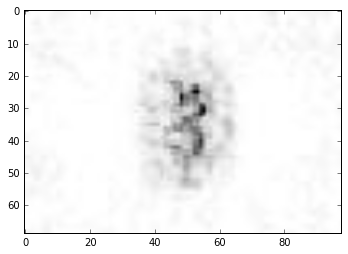

In [39]:
somei = 240
img1 = test_x[somei]
img1 = np.reshape(img1, ((69,98)))
plt.imshow(img1,cmap=plt.cm.gray)
print(test_y[somei])

In [42]:
len(train_x)

1240

In [64]:
joe = np.array([[1,2],[3,4]])

In [65]:
np.mean(joe)

2.5

In [88]:
img1.shape

(69, 98)

In [98]:
A = np.array([[1,2,3],[4,5,6], [7,8,9],[10,11,12]])

In [99]:
A

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

In [100]:
A[-1:,-1:]

array([[12]])

In [101]:
np.flipud(A)


array([[10, 11, 12],
       [ 7,  8,  9],
       [ 4,  5,  6],
       [ 1,  2,  3]])

In [21]:
train_x, train_y, test_x, test_y =filtrarRazon(listanueva, 2)

(2752, 6762)


In [112]:
train_x.shape

(1240, 6762)

In [115]:
oi = np.ones((5,))

In [116]:
ou = np.zeros((5,))

In [117]:
jo = []
jo.append(oi)
jo.append(ou)

In [120]:
pe = np.asarray(jo)

In [121]:
pe.shape

(2, 5)

In [18]:
for i in range(3,7):
    print(i)

3
4
5
6
